In [52]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
config = {'font.size': 12,
          'mathtext.fontset': 'stix'}
mpl.rcParams.update(config)
import math

# 常量
R0 = 7 # m
p0 = 20 # MPa
G = 500 # MPa
G1 = 500 # MPa
G2 = 10000 # MPa
eta = 10000 # MPa·d
eta1 = 10000 # MPa·d
eta2 = 2000 # MPa·d
KS = 50 # 10^3kN·m^-3
r = 7 # m

t = np.arange(2, 200, 1)
ti =  2

In [53]:
deat_u = ((ti/eta+1/G)*p0*R0 )



In [54]:
result = pd.DataFrame()
result['t'] = t
result.index = result['t']
result.drop('t', axis=1, inplace=True)

# Maxwell
# \sigma_r
sigma_r = [(1-((2*G)/(KS*R0+2*G))*(R0**2/r**2)*math.exp(-(KS*R0*G*t0)/((KS*R0+2*G)*eta)))*(p0+KS*deat_u) for t0 in t]
result['Maxwell_sigma_r'] = sigma_r
# \sigma_\theta
sigma_theta = [(1+((2*G)/(KS*R0+2*G))*(R0**2/r**2)*math.exp(-(KS*R0*G*t0)/((KS*R0+2*G)*eta)))*(p0+KS*deat_u) for t0 in t]
result['Maxwell_sigma_theta'] = sigma_theta
# \varepsilon_r
varepsilon_r = [(-1+((2*G)/(KS*R0+2*G))*math.exp(-(KS*R0*G*t0)/((KS*R0+2*G)*eta)))*(R0/(KS*r**2))*(p0+KS*deat_u) for t0 in t]
result['Maxwell_varepsilon_r'] = varepsilon_r
# \varepsilon_\theta
varepsilon_theta = [-(-1+((2*G)/(KS*R0+2*G))*math.exp(-(KS*R0*G*t0)/((KS*R0+2*G)*eta)))*(R0/(KS*r**2))*(p0+KS*deat_u) for t0 in t]
result['Maxwell_varepsilon_theta'] = varepsilon_theta
# u_r
u_r = [-(-1+((2*G)/(KS*R0+2*G))*math.exp(-(KS*R0*G*t0)/((KS*R0+2*G)*eta)))*(R0/(KS*r))*(p0+KS*deat_u) for t0 in t]
result['Maxwell_u_r'] = u_r

# Kelvin
# \sigma_r
sigma_r = [(1-((2*G)/(KS*R0+2*G))*(R0**2/r**2))*p0-((KS*R0)/(KS*R0+2*G))*(R0**2/r**2)*math.exp(-((KS*R0+2*G)*t0)/(2*eta))*(p0+KS*deat_u) for t0 in t]
result['Kelvin_sigma_r'] = sigma_r
# \sigma_\theta
sigma_theta = [(1+((2*G)/(KS*R0+2*G))*(R0**2/r**2))*p0+((KS*R0)/(KS*R0+2*G))*(R0**2/r**2)*math.exp(-((KS*R0+2*G)*t0)/(2*eta))*(p0+KS*deat_u) for t0 in t]
result['Kelvin_sigma_theta'] = sigma_theta
# \varepsilon_r
varepsilon_r = [(-1+math.exp(-((KS*R0+2*G)*t0)/(2*eta)))*(1/(KS*R0+2*G))*(R0**2/r**2)*(p0+KS*deat_u) for t0 in t]
result['Kelvin_varepsilon_r'] = varepsilon_r
# \varepsilon_\theta
varepsilon_theta = [-(-1+math.exp(-((KS*R0+2*G)*t0)/(2*eta)))*(1/(KS*R0+2*G))*(R0**2/r**2)*(p0+KS*deat_u) for t0 in t]
result['Kelvin_varepsilon_theta'] = varepsilon_theta
# u_r
u_r = [-(-1+math.exp(-((KS*R0+2*G)*t0)/(2*eta)))*(1/(KS*R0+2*G))*(R0**2/r)*(p0+KS*deat_u) for t0 in t]
result['Kelvin_u_r'] = u_r

# Generalized_Kelvin
# \sigma_r
sigma_r = [(1-((2*G1*G2)/(KS*R0*(G1+G2)+2*G1*G2))*(R0**2/r**2))*p0+(G1/((KS*R0+2*G2)*G1+KS*R0*G2)-1/(KS*R0+2*G2))*(2*G2*R0**2/r**2)*math.exp(-(G1/eta+(KS*R0*G2)/((KS*R0+2*G2)*eta))*t0)*(p0+KS*deat_u) for t0 in t]
result['Generalized_Kelvin_sigma_r'] = sigma_r
# \sigma_\theta
sigma_theta = [(1+((2*G1*G2)/(KS*R0*(G1+G2)+2*G1*G2))*(R0**2/r**2))*p0-(G1/((KS*R0+2*G2)*G1+KS*R0*G2)-1/(KS*R0+2*G2))*(2*G2*R0**2/r**2)*math.exp(-(G1/eta+(KS*R0*G2)/((KS*R0+2*G2)*eta))*t0)*(p0+KS*deat_u) for t0 in t]
result['Generalized_Kelvin_sigma_theta'] = sigma_theta
# \varepsilon_r
varepsilon_r = [(-(G1+G2)*(2*G2+KS*R0)+2*G2**2*math.exp(-(KS*R0*(G1+G2)+2*G1*G2)/((2*G2+KS*R0)*eta)*t0))/((KS*R0*(G1+G2)+2*G1*G2)*(2*G2+KS*R0)*r**2)*R0**2*(p0+KS*deat_u) for t0 in t]
result['Generalized_Kelvin_varepsilon_r'] = varepsilon_r
# \varepsilon_\theta
varepsilon_theta = [-(-(G1+G2)*(2*G2+KS*R0)+2*G2**2*math.exp(-(KS*R0*(G1+G2)+2*G1*G2)/((2*G2+KS*R0)*eta)*t0))/((KS*R0*(G1+G2)+2*G1*G2)*(2*G2+KS*R0)*r**2)*R0**2*(p0+KS*deat_u) for t0 in t]
result['Generalized_Kelvin_varepsilon_theta'] = varepsilon_theta
# u_r
u_r = [-(-(G1+G2)*(2*G2+KS*R0)+2*G2**2*math.exp(-(KS*R0*(G1+G2)+2*G1*G2)/((2*G2+KS*R0)*eta)*t0))/((KS*R0*(G1+G2)+2*G1*G2)*(2*G2+KS*R0)*r)*R0**2*(p0+KS*deat_u) for t0 in t]
result['Generalized_Kelvin_u_r'] = u_r

# Burgers
sigma_1 = 2*G1*G2*eta1+G1*KS*R0*eta1+G1*KS*R0*eta2+G2*KS*R0*eta1
sigma_2 = 4*G1*eta1*eta2+2*KS*R0*eta1*eta2
sigma_4 = math.sqrt((G1**2)*(G2**2)*(eta1**2)+(G1**2)*G2*KS*R0*(eta1**2)-(G1**2)*G2*KS*R0*eta1*eta2+(G1**2)*(KS**2)*(R0**2)*(eta1**2)/4+(G1**2)*(KS**2)*(R0**2)*eta1*eta2/2+(G1**2)*(KS**2)*(R0**2)*(eta2**2)/4+G1*(G2**2)*KS*R0*(eta1**2)+G1*G2*(KS**2)*(R0**2)*(eta1**2)/2-G1*G2*(KS**2)*(R0**2)*eta1*eta2/2+(G2**2)*(KS**2)*(R0**2)*(eta1**2)/4)
sigma_5 = 2*G1+KS*R0
sigma_3 = sigma_4/(eta1*eta2*sigma_5)
# \sigma_r
sigma_r = [(p0+KS*deat_u)-((2*G1)/(KS*R0+2*G1))*(R0**2/r**2)*math.exp(-sigma_1/sigma_2*t0)*(math.cosh(sigma_3*t0)-eta1*eta2*math.sinh(sigma_3*t0)*sigma_5*(sigma_1/sigma_2-G2/eta2)/sigma_4)*(p0+KS*deat_u) for t0 in t]
result['Burgers_sigma_r'] = sigma_r
# \sigma_\theta
sigma_theta = [(p0+KS*deat_u)+((2*G1)/(KS*R0+2*G1))*(R0**2/r**2)*math.exp(-sigma_1/sigma_2*t0)*(math.cosh(sigma_3*t0)-eta1*eta2*math.sinh(sigma_3*t0)*sigma_5*(sigma_1/sigma_2-G2/eta2)/sigma_4)*(p0+KS*deat_u) for t0 in t]
result['Burgers_sigma_theta'] = sigma_theta
# \varepsilon_r
varepsilon_r = [(-1+((2*G1)/(KS*R0+2*G1))*(math.cosh(sigma_3*t0)-eta1*eta2*math.sinh(sigma_3*t0)*sigma_5*(sigma_1/sigma_2-G2/eta2)/sigma_4)*math.exp(-sigma_1*t0/sigma_2))*((R0*(p0+KS*deat_u))/(KS*(r**2))) for t0 in t]
result['Burgers_varepsilon_r'] = varepsilon_r
# \varepsilon_\theta
varepsilon_theta = [-(-1+((2*G1)/(KS*R0+2*G1))*(math.cosh(sigma_3*t0)-eta1*eta2*math.sinh(sigma_3*t0)*sigma_5*(sigma_1/sigma_2-G2/eta2)/sigma_4)*math.exp(-sigma_1*t0/sigma_2))*((R0*(p0+KS*deat_u))/(KS*(r**2))) for t0 in t]
result['Burgers_varepsilon_theta'] = varepsilon_theta
# u_r
u_r = [-(-1+((2*G1)/(KS*R0+2*G1))*(math.cosh(sigma_3*t0)-eta1*eta2*math.sinh(sigma_3*t0)*sigma_5*(sigma_1/sigma_2-G2/eta2)/sigma_4)*math.exp(-sigma_1*t0/sigma_2))*((R0*(p0+KS*deat_u))/(KS*r)) for t0 in t]
result['Burgers_u_r'] = u_r

In [55]:
result

,Maxwell_sigma_r,Maxwell_sigma_theta,Maxwell_varepsilon_r,Maxwell_varepsilon_theta,Maxwell_u_r,Kelvin_sigma_r,Kelvin_sigma_theta,Kelvin_varepsilon_r,Kelvin_varepsilon_theta,Kelvin_u_r,Generalized_Kelvin_sigma_r,Generalized_Kelvin_sigma_theta,Generalized_Kelvin_varepsilon_r,Generalized_Kelvin_varepsilon_theta,Generalized_Kelvin_u_r,Burgers_sigma_r,Burgers_sigma_theta,Burgers_varepsilon_r,Burgers_varepsilon_theta,Burgers_u_r
t,,,,,,,,,,,,,,,,,,,,
2,9.848876,60.951124,-0.028140,0.028140,0.196978,-2.833585,42.833585,-0.003311,0.003311,0.023180,-2.409917,42.409917,-0.004939,0.004939,0.034573,10.169110,60.630890,-0.029055,0.029055,0.203382
3,10.177957,60.622043,-0.029080,0.029080,0.203559,-2.310182,42.310182,-0.004807,0.004807,0.033648,-1.903983,41.903983,-0.006385,0.006385,0.044692,10.489937,60.310063,-0.029971,0.029971,0.209799
4,10.502799,60.297201,-0.030008,0.030008,0.210056,-1.820942,41.820942,-0.006205,0.006205,0.043433,-1.430930,41.430930,-0.007736,0.007736,0.054153,10.806672,59.993328,-0.030876,0.030876,0.216133
5,10.823458,59.976542,-0.030924,0.030924,0.216469,-1.363636,41.363636,-0.007511,0.007511,0.052579,-0.988621,40.988621,-0.009000,0.009000,0.062999,11.119379,59.680621,-0.031770,0.031770,0.222388
6,11.139987,59.660013,-0.031829,0.031829,0.222800,-0.936180,40.936180,-0.008733,0.008733,0.061128,-0.575059,40.575059,-0.010181,0.010181,0.071270,11.428110,59.371890,-0.032652,0.032652,0.228562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,33.306516,37.493484,-0.095161,0.095161,0.666130,5.185168,34.814832,-0.026222,0.026222,0.183555,5.374753,34.625247,-0.027181,0.027181,0.190267,33.265326,37.534674,-0.095044,0.095044,0.665307
196,33.333479,37.466521,-0.095239,0.095239,0.666670,5.185169,34.814831,-0.026222,0.026222,0.183555,5.374755,34.625245,-0.027181,0.027181,0.190267,33.292468,37.507532,-0.095121,0.095121,0.665849
197,33.360094,37.439906,-0.095315,0.095315,0.667202,5.185170,34.814830,-0.026222,0.026222,0.183555,5.374756,34.625244,-0.027181,0.027181,0.190267,33.319266,37.480734,-0.095198,0.095198,0.666385


FileNotFoundError: [Errno 2] No such file or directory: 'fig/sigma_r.tif'

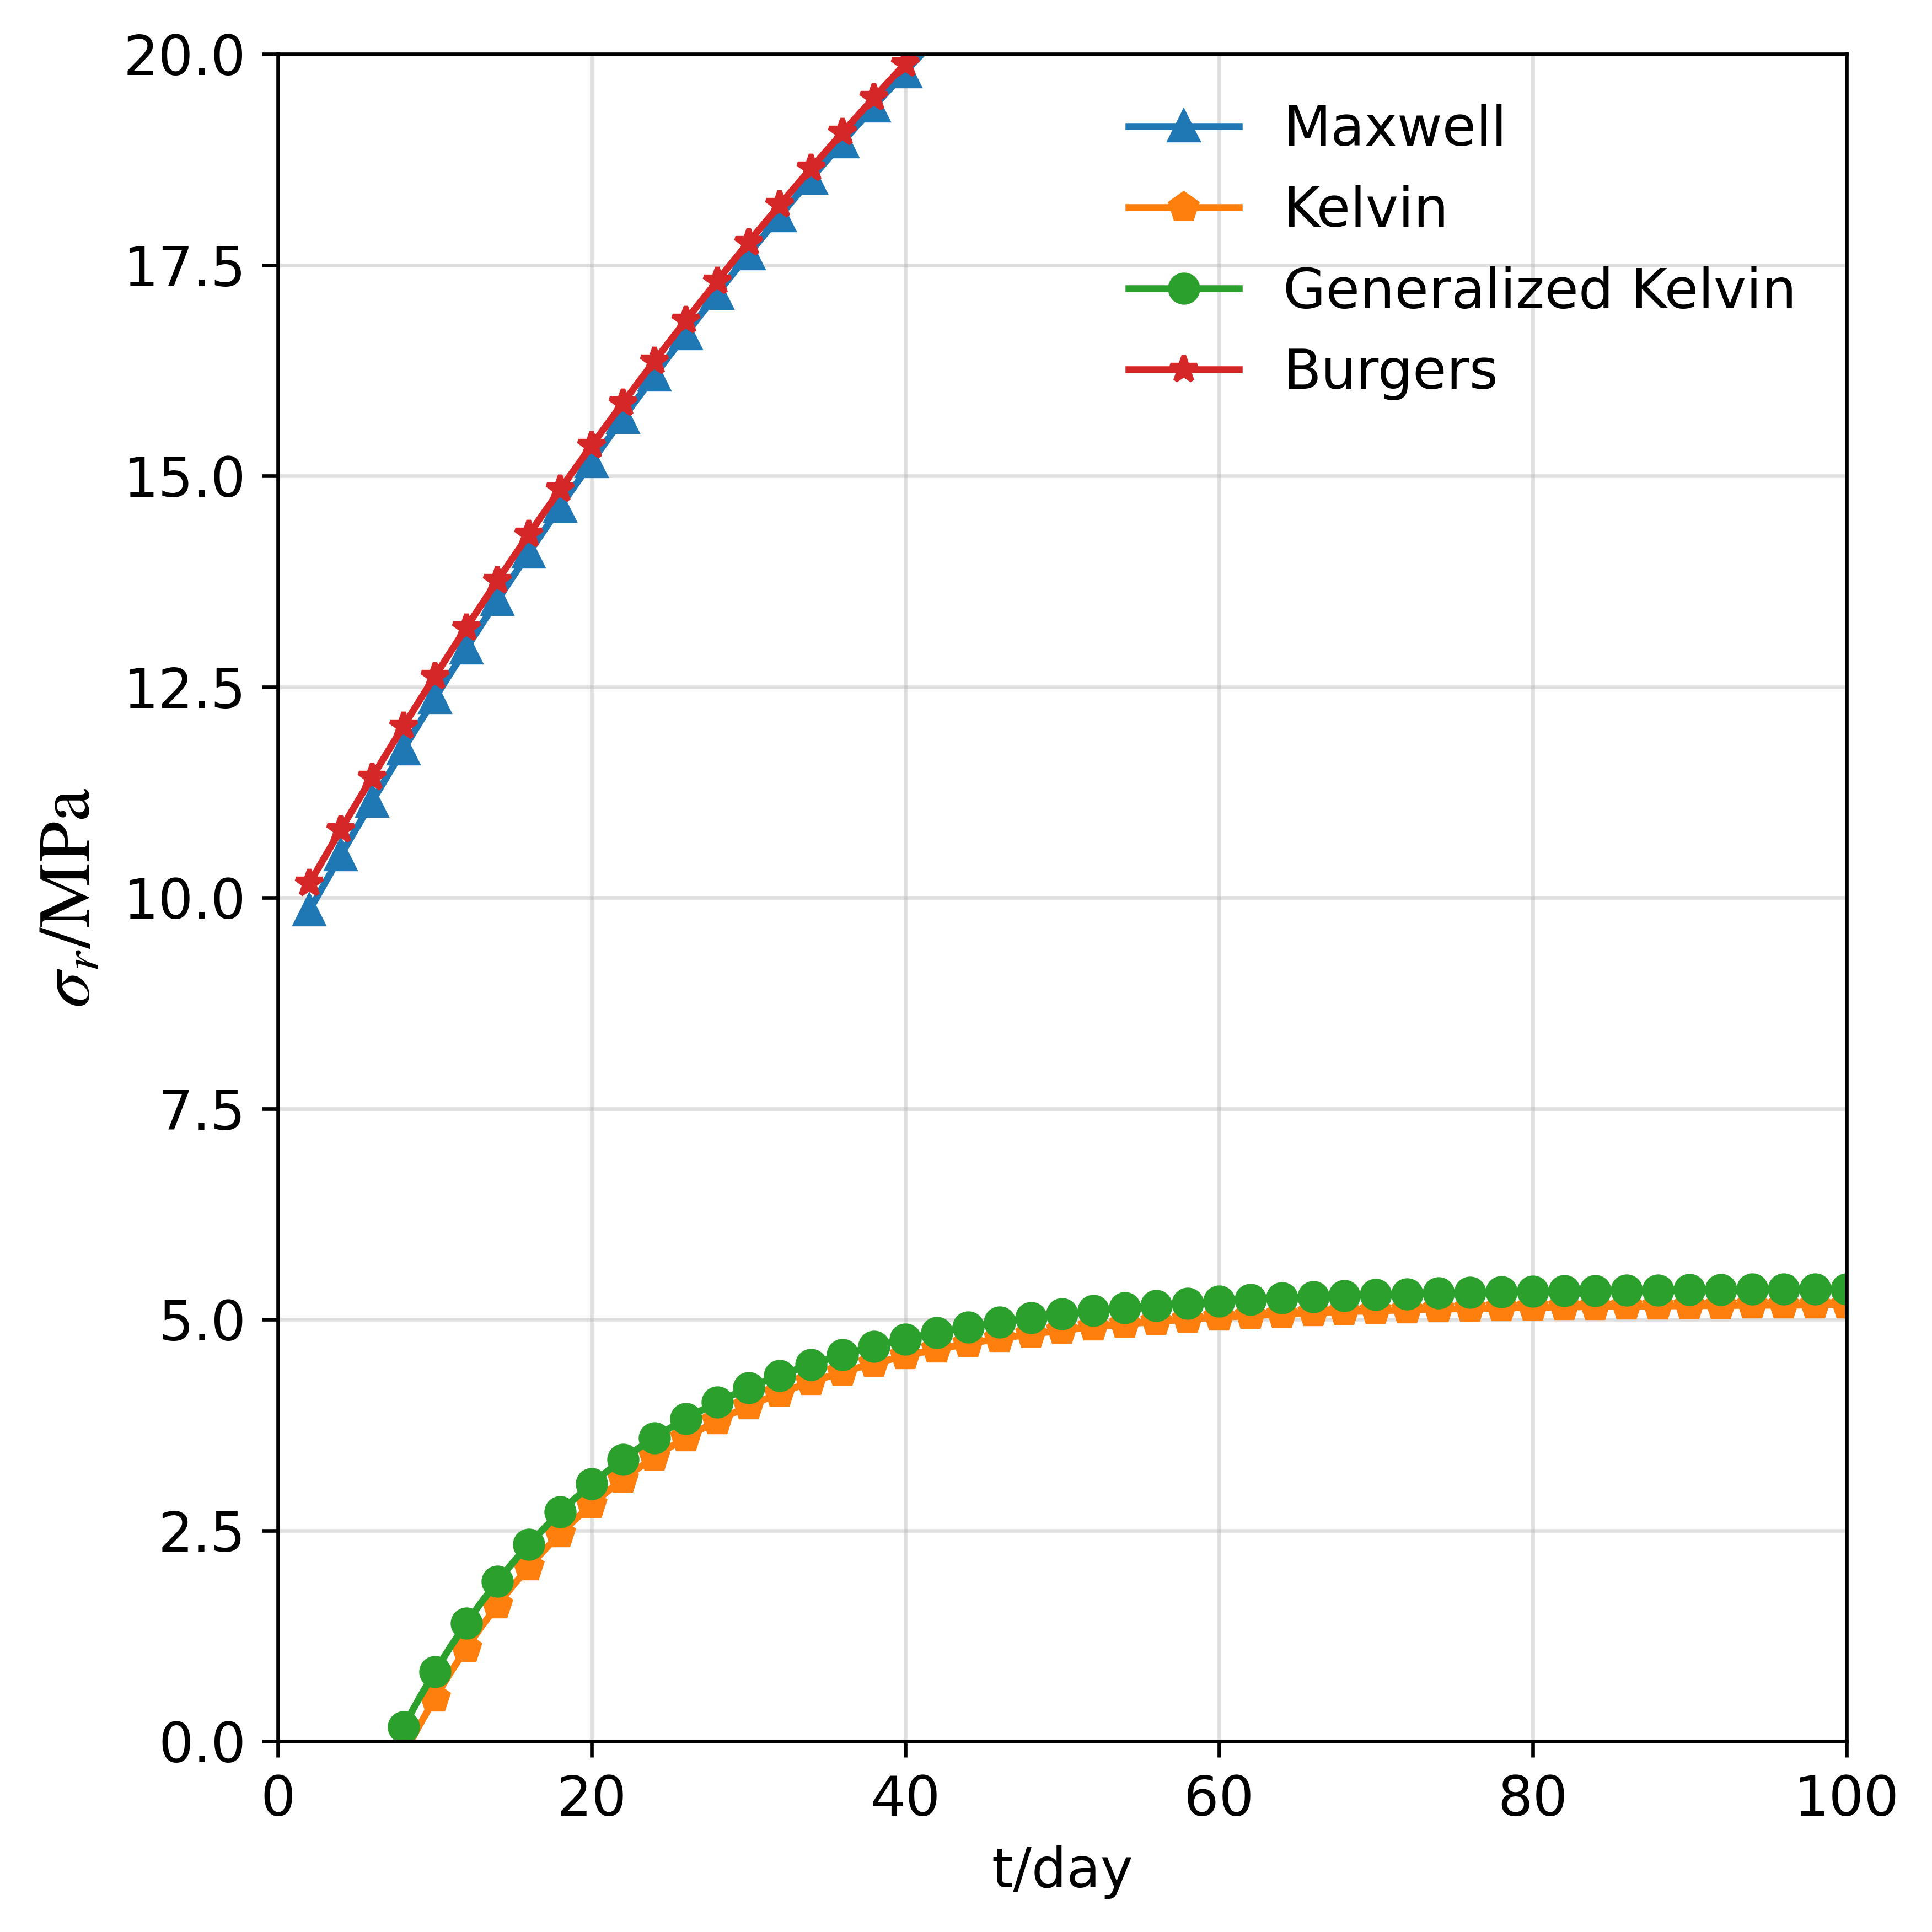

In [56]:
plt.figure(figsize=(6, 6), dpi=600)
plt.plot(result.index.values, result.iloc[:, 0], marker='^', markevery=2, color='tab:blue', label='Maxwell')
plt.plot(result.index.values, result.iloc[:, 5], marker='p', markevery=2, color='tab:orange', label='Kelvin')
plt.plot(result.index.values, result.iloc[:, 10], marker='o', markevery=2, color='tab:green', label='Generalized Kelvin')
plt.plot(result.index.values, result.iloc[:, 15], marker='*', markevery=2, color='tab:red', label='Burgers')
plt.xlim([0, 100])
plt.ylim([0, 20])
plt.grid('on', alpha=0.4)
plt.xlabel('t/day')
plt.ylabel('$\sigma_r/\mathrm{MPa}$', fontsize=16)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('fig/sigma_r.tif', dpi=600)

In [ ]:
plt.figure(figsize=(6, 6), dpi=600)
plt.plot(result.index.values, result.iloc[:, 1], marker='^', markevery=2, color='tab:blue', label='Maxwell')
plt.plot(result.index.values, result.iloc[:, 6], marker='p', markevery=2, color='tab:orange', label='Kelvin')
plt.plot(result.index.values, result.iloc[:, 11], marker='o', markevery=2, color='tab:green', label='Generalized Kelvin')
plt.plot(result.index.values, result.iloc[:, 16], marker='*', markevery=2, color='tab:red', label='Burgers')
plt.xlim([0, 100])
plt.ylim([20, 40])
plt.grid('on', alpha=0.4)
plt.xlabel('t/day')
plt.ylabel('$\sigma_\\theta/\mathrm{MPa}$', fontsize=16)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('fig/sigma_theta.tif', dpi=600)

: 

In [ ]:
plt.figure(figsize=(6, 6), dpi=600)
plt.plot(result.index.values, result.iloc[:, 2], marker='^', markevery=2, color='tab:blue', label='Maxwell')
plt.plot(result.index.values, result.iloc[:, 7], marker='p', markevery=2, color='tab:orange', label='Kelvin')
plt.plot(result.index.values, result.iloc[:, 12], marker='o', markevery=2, color='tab:green', label='Generalized Kelvin')
plt.plot(result.index.values, result.iloc[:, 17], marker='*', markevery=2, color='tab:red', label='Burgers')
plt.xlim([0, 100])
plt.ylim([-0.05, 0])
plt.grid('on', alpha=0.4)
plt.xlabel('t/day')
plt.ylabel('$\\varepsilon_r$', fontsize=16)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('fig/varepsilon_r.tif', dpi=600)

: 

In [ ]:
plt.figure(figsize=(6, 6), dpi=600)
plt.plot(result.index.values, result.iloc[:, 3], marker='^', markevery=2, color='tab:blue', label='Maxwell')
plt.plot(result.index.values, result.iloc[:, 8], marker='p', markevery=2, color='tab:orange', label='Kelvin')
plt.plot(result.index.values, result.iloc[:, 13], marker='o', markevery=2, color='tab:green', label='Generalized Kelvin')
plt.plot(result.index.values, result.iloc[:, 18], marker='*', markevery=2, color='tab:red', label='Burgers')
plt.xlim([0, 100])
plt.ylim([0, 0.05])
plt.grid('on', alpha=0.4)
plt.xlabel('t/day')
plt.ylabel('$\\varepsilon_\\theta$', fontsize=16)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('fig/varepsilon_theta.tif', dpi=600)

: 

In [ ]:
plt.figure(figsize=(6, 6), dpi=600)
plt.plot(result.index.values, result.iloc[:, 4], marker='^', markevery=2, color='tab:blue', label='Maxwell')
plt.plot(result.index.values, result.iloc[:, 9], marker='p', markevery=2, color='tab:orange', label='Kelvin')
plt.plot(result.index.values, result.iloc[:, 14], marker='o', markevery=2, color='tab:green', label='Generalized Kelvin')
plt.plot(result.index.values, result.iloc[:, 19], marker='*', markevery=2, color='tab:red', label='Burgers')
plt.xlim([0, 100])
plt.ylim([0, 0.35])
plt.grid('on', alpha=0.4)
plt.xlabel('t/day')
plt.ylabel('$u_r/\mathrm{m}$', fontsize=16)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('fig/u_r.tif', dpi=600)

: 

In [ ]:
u_r_df = result.iloc[:, [4, 9, 14, 19]]
u_r_t1 = u_r_df.iloc[:-1]
u_r_t2 = u_r_df.iloc[1:]
u_r_t2.index = np.arange(0, 100, 2)
u_r_prime = (u_r_t2 - u_r_t1) / 2 * 100
plt.figure(figsize=(6, 6), dpi=600)
plt.plot(u_r_prime.index.values, u_r_prime.iloc[:, 0], marker='^', markevery=2, color='tab:blue', label='Maxwell')
plt.plot(u_r_prime.index.values, u_r_prime.iloc[:, 1], marker='p', markevery=2, color='tab:orange', label='Kelvin')
plt.plot(u_r_prime.index.values, u_r_prime.iloc[:, 2], marker='o', markevery=2, color='tab:green', label='Generalized Kelvin')
plt.plot(u_r_prime.index.values, u_r_prime.iloc[:, 3], marker='*', markevery=2, color='tab:red', label='Burgers')
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.grid('on', alpha=0.4)
plt.xlabel('t/day')
plt.ylabel('$\mathrm{Deformation\ rate/cm·day^{-1}}$', fontsize=16)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('fig/Deformation rate.tif', dpi=600)

: 